In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Since my ID mod 3 = 2. I will go with funtion 2 as per the rules.
np.mod(201693140,3)

2

$f(x) = \left(xy^3-x+\dfrac{21}{8}\right)^2+\left(xy^2-x+\dfrac{9}{4}\right)^2+\left(xy-x+\dfrac{3}{2}\right)^2$

In [24]:
def f(x:float, y:float):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

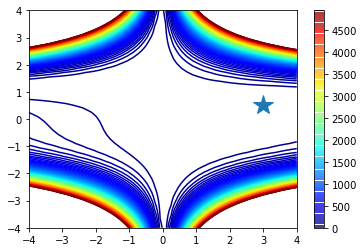

In [160]:
#define the beala funtion

reigon_x1 = np.linspace(-4, 4, 50)
reigon_x2 = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(reigon_x1, reigon_x2)
Z = f(X, Y)
levels = [x*50 for x in range(100)]

plt.contour(X, Y, Z,levels,cmap=plt.cm.jet);
plt.colorbar();


 $\frac{df}{dx} = 6xy^2\left(xy^3-x+\dfrac{21}{8}\right)+4xy\left(xy^2-x+\dfrac{9}{4}\right)+2x\left(xy-x+\dfrac{3}{2}\right)$

In [41]:
def dfdx(x:float, y:float):
    return 2*(y**3-1)*(y**3*x-x+21/8)+2*(y**2-1)*(y**2*x-x+9/4)+2*(y-1)*(y*x-x+3/2)

$\frac{df}{dy} = 2\left(y^3-1\right)\left(y^3x-x+\dfrac{21}{8}\right)+2\left(y^2-1\right)\left(y^2x-x+\dfrac{9}{4}\right)+2\left(y-1\right)\left(yx-x+\dfrac{3}{2}\right)$

In [42]:
def dfdy(x:float, y:float):
    return 6*x*y**2*(x*y**3-x+21/8)+4*x*y*(x*y**2-x+9/4)+2*x*(x*y-x+3/2)

$\frac{df}{dx^2}=2\left(y^3-1\right)^2+2\left(y^2-1\right)^2+2\left(y-1\right)^2$

In [43]:
def dfdx2(x:float, y:float):
    return 2*(y**3-1)**2+2*(y**2-1)**2+2*(y-1)**2

$ \frac{df}{dy^2} = 18x^2y^4+12xy\left(xy^3-x+\dfrac{21}{8}\right)+4x\left(xy^2-x+\dfrac{9}{4}\right)+8x^2y^2+2x^2$

In [44]:
def dfdy2(x:float, y:float):
    return 18*x**2*y**4+12*x*y*(x*y**3-x+21/8)+4*x*(x*y**2-x+9/4)+8*x**2*y**2+2*x**2

$ \frac{df}{dxdy} = 6y^2\left(xy^3-x+\dfrac{21}{8}\right)+6xy^2\left(y^3-1\right)+4y\left(xy^2-x+\dfrac{9}{4}\right)+4xy\left(y^2-1\right)+2\left(xy-x+\dfrac{3}{2}\right)+2x\left(y-1\right)$

In [45]:
def dfdxy(x:float, y:float):
    return 6*y**2*(x*y**3-x+21/8)+6*x*y**2*(y**3-1)+4*y*(x*y**2-x+9/4)+4*x*y*(y**2-1)+2*(x*y-x+3/2)+2*x*(y-1) 

$ \frac{df}{dydx} = 6y^2\left(y^3x-x+\dfrac{21}{8}\right)+4y\left(y^2x-x+\dfrac{9}{4}\right)+2\left(yx-x+\dfrac{3}{2}\right)+6y^2\left(y^3-1\right)x+4y\left(y^2-1\right)x+2\left(y-1\right)x$

In [46]:
def dfdyx(x:float, y:float):
    return 6*y**2*(y**3*x-x+21/8)+4*y*(y**2*x-x+9/4)+2*(y*x-x+3/2)+6*y**2*(y**3-1)*x+4*y*(y**2-1)*x+2*(y-1)*x

Let Jacobian of f be

Jacob(x,y) =
\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy}\\
\end{bmatrix}

In [47]:
def jacob(x:float, y:float):
    return [dfdx(x,y),dfdy(x,y)]

Let Hessian  of f be

Hess(x,y) =
\begin{bmatrix}
\frac{df}{dx^2} & \frac{df}{dxdy}\\
\frac{df}{dydx} & \frac{df}{dy^2}
\end{bmatrix}

In [60]:
def hess(x:float, y:float):
    return [[dfdx2(x,y),dfdxy(x,y)],
            [dfdyx(x,y),dfdy2(x,y)]]

In [61]:
jacob(1,-1)

[-0.5, -6.25]

In [62]:
hess(1,-1)

[[16, -22.25], [-22.25, 29.5]]

## Random Search

In [213]:
def random_search(f,samples):
    best_sample = f(samples[0][0],samples[0][1])
    search_path = [(samples[0][0],samples[0][1])]
    sample_diffreance = 1
    best_index  = 0
    real_min = f(3,0.5)
    for i in range(len(samples)-1):
        
        next_sample = f(samples[i][0],samples[i][1])
        
        if sample_diffreance < 10**-3:
            print("STOP STOP STOP")
            break
            
        if next_sample < best_sample:
            sample_diffreance = best_sample-next_sample
            search_path.append((samples[i][0],samples[i][1]))
            best_sample = next_sample
            best_index = i
    print(abs(real_min-best_sample))
    return (best_sample,samples[best_index],search_path)

In [214]:
samples = []
for _ in range(10000):
    samples.append(np.random.uniform(-4,4,2))
    
(min_value,cord,path)=random_search(f,samples)
path_x = []
path_y = []
for i in range(len(path)):
    path_x.append(path[i][0])
    path_y.append(path[i][1])
    

0.004644751376526007


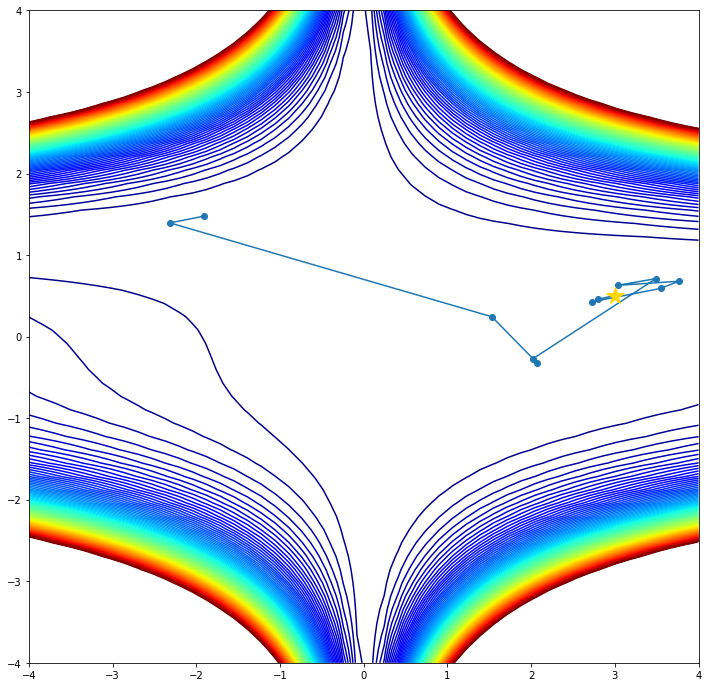

In [202]:
plt.figure(figsize=(12,12))
plt.contour(X, Y, Z,levels,cmap=plt.cm.jet);


plt.scatter(path_x,path_y)  
plt.plot(path_x,path_y)  
plt.plot(3,0.5,'*',markersize=18,color="gold")


plt.show()